In [1]:
from qiskit import QuantumCircuit, QuantumRegister

In [3]:
# 各量子ビットを定義
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

# 量子回路（V_f）を作成
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])

# 最終出力量子ビットを定義
final_output_bit = QuantumRegister(1, 'final-output')

# outputからfinal-outputへのコピー回路を作成
copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)

C:\Users\ambit\AppData\Local\Temp\ipykernel_5508\3934283956.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  (Vf.inverse() + copy + Vf).draw('mpl')


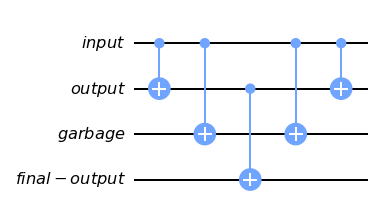

In [6]:
# 上で作成した回路をテキストと同様に結合
(Vf.inverse() + copy + Vf).draw('mpl')

1. 「output」レジスターが$|0\rangle$で初期化されているとき出力が「final output」(のみ)に正しく書き込まれることを示しましょう。

$\ket{\text{input}, \text{output}, \text{garbage}, \text{final-output}}$ に対して、上記の回路を適用すると、
$$\ket{x, 0, 0, 0} \xrightarrow{V_f} \ket{x, f(x), g(x), 0} \xrightarrow{\text{copy}} \ket{x, f(x), g(x), f(x)} \xrightarrow{V_f^\dagger} \ket{x, 0, 0, f(x)}$$  
となる。計算結果から出力がfinal-outputのみに正しく書き込まれることが分かる。

2. 「output」レジスターが$|1\rangle$.で初期化されているとき何が起こるでしょう。

$\ket{\text{input}, \text{output}, \text{garbage}, \text{final-output}}$ に対して、上記の回路を適用すると、
$$\ket{x, 1, 0, 0} \xrightarrow{V_f} \ket{x, 1 \oplus f(x), g(x), 0} \xrightarrow{\text{copy}} \ket{x, 1 \oplus f(x), g(x), 1 \oplus f(x)} \xrightarrow{V_f^\dagger} \ket{x, 1, 0, 1 \oplus f(x)}$$  
となる。計算結果から出力(final-output)は、$1 \oplus f(x)$。